# Experiment Design

Our sample was obtained through a Google Form survey. This survey was shared to people from the targeted audience, specifically university students aged between 20 and 24 attending Concordia University.

Initially, participants were asked about their technology use before bedtime, including the duration before sleep they typically ceased using their phones and the activities they engaged in on their devices. This information provided insights into participants' exposure to electronic devices and potentially stimulating content preceding sleep.

Furthermore, participants were queried about their sleep patterns and behaviors, such as where they habitually placed their phones before sleep, the time it took them to fall asleep, the frequency of nighttime awakenings, and the average nightly duration of sleep. These questions aimed to capture the duration and quality of participants' sleep, as well as any disturbances affecting sleep continuity.

Moreover, participants were requested to rate their average sleep quality, providing subjective feedback on their overall sleep experience. This rating helped quantify participants' perceptions of their sleep, ranging from feeling refreshed and ready to start the day to frequently feeling tired and unrested.

Additionally, participants were invited to disclose any underlying conditions that might influence their sleep quality, such as anxiety or ADHD. Understanding the presence of such conditions helped contextualize individual differences in sleep patterns and responses to technology use.

Finally, participants were asked about their typical sleep environment and exercise habits, as these factors could also impact sleep quality.

Our form was open from April 3rd at 7am to April 4th at 1pm. In this interval of time, we received 57 responses to our survey. Due to the nature of an online survey, the responses we collected were subjective. Since it is difficult for respondents to measure the quality and quantity of sleep on their own there is a large amount of subjectivity in our results.


In [1]:
# Setup Project Environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

plt.style.use("ggplot")
pd.set_option(
  "display.max_columns", 200
)  # display up to 200 columns (removes '...' hidden columns)

In [2]:
# Read in Data and Display Shape (rows, columns)
df = pd.read_csv("survey_data.csv")
df.shape

(55, 13)

In [3]:
# Drop the columns that don't agree with the Confidentiality Agreement
if "Agreement of Confidentiality" in df.columns:
  df = df[
    df["Agreement of Confidentiality"]
    == "I agree that the information submitted will be kept confidential, and abide by the terms of confidentiality and anonymity."
  ].reset_index(drop=True)

# Drop the Timestamp, Agreement of Confidentiality and Feedback columns
try:
  df = df.drop(
    columns=[
      "Timestamp",
      "Agreement of Confidentiality",
      "Any thoughts you would like to add? (Optional)",
    ],
    axis=1,
  )
except KeyError:
  pass

# Rename Columns
df = df.rename(
  columns={
    "How long before you go to sleep do you usually stop using your phone, on a regular basis?": "end_of_phone_usage",
    "What do you do on your phone before going to sleep?": "end_of_phone_usage_activity",
    "Where do you usually put your phone right before you go to sleep?": "phone_placement",
    "How long does it take you to fall asleep?": "time_to_fall_asleep",
    "How often do you wake up during the night?": "night_wakeups",
    "How many hours of sleep do you get per night on average?": "hours_of_sleep",
    "How would you rate your average sleep quality? \n(ex: waking up feeling refreshed and ready to start the day, or often feel tired and like you didn't sleep well)?": "sleep_quality",
    "Do you have any underlying conditions that may affect the quality of your sleep? (ex: Anxiety, ADHD, etc.)": "underlying_conditions",
    "Please check all of the following that apply to your typical sleep environment:": "sleep_environment",
    "How often do you exercise?": "exercise_frequency",
  }
)

# Distribution Graphs Based on Device Usage


Merged Data (30 minutes - 1 hour & > 1 hour)
   Count (n): 13
   Mean (mu): 6.846153846153846
   Standard Deviation: 1.166596222161777



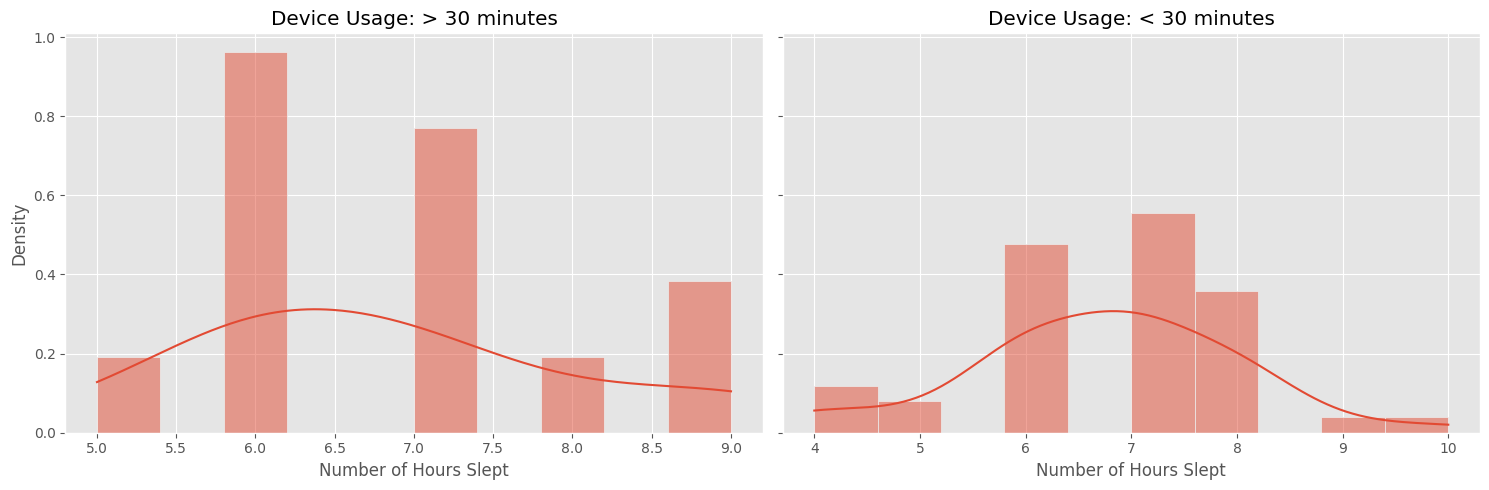

In [4]:
# Define the categories for end_of_phone_usage
categories = ["< 30 minutes", "30 minutes - 1 hour", "> 1 hour"]

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Merge data for "30 minutes - 1 hour" and "> 1 hour" categories
merged_df = df[df["end_of_phone_usage"].isin(["30 minutes - 1 hour", "> 1 hour"])]

# Calculate n, mean, and standard deviation for merged data
n = len(merged_df)
mu, std = norm.fit(merged_df["hours_of_sleep"])

# Print n, mean, and standard deviation for merged data
print("Merged Data (30 minutes - 1 hour & > 1 hour)")
print(f"   Count (n): {n}")
print(f"   Mean (mu): {mu}")
print(f"   Standard Deviation: {std}\n")

# Create a smoothed histogram using the fitted Gaussian distribution for merged data
sns.histplot(merged_df["hours_of_sleep"], bins=10, ax=axes[0], kde=True, stat="density")

# Set title and labels for merged data plot
axes[0].set_title("Device Usage: > 30 minutes")
axes[0].set_xlabel("Number of Hours Slept")
axes[0].set_ylabel("Density")

# Iterate over each category of end_of_phone_usage
for i, category in enumerate(categories[:1]):  # Skipping "< 30 minutes" category
  # Filter the dataframe for the current category
  filtered_df = df[df["end_of_phone_usage"] == category]

  # Create a smoothed histogram using the fitted Gaussian distribution
  sns.histplot(
    filtered_df["hours_of_sleep"], bins=10, ax=axes[1], kde=True, stat="density"
  )

  # Set title and labels for individual category plot
  axes[1].set_title(f"Device Usage: {category}")
  axes[1].set_xlabel("Number of Hours Slept")

# Adjust layout
plt.tight_layout()
plt.show()

Mean: 6.76h
Standard Deviation: 1.24h


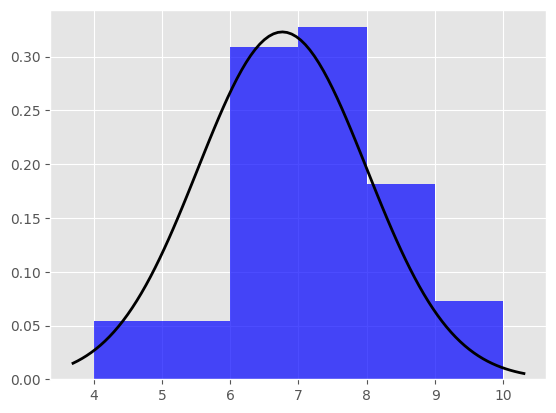

In [5]:
hours_of_sleep = df["hours_of_sleep"]

mu, std = norm.fit(hours_of_sleep)

print(f"Mean: {mu:.2f}h\nStandard Deviation: {std:.2f}h")

# Plot the histogram.
plt.hist(hours_of_sleep, bins=6, density=True, alpha=0.7, color="blue")

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, "k", linewidth=2)

plt.show()

# Histograms Detailing Smaller Quantitative Variables Per Device Usage Group


## Category: < 30 minutes


Values associated with question: exercise_frequency
exercise_frequency
1-3 times per week            16
Less than once per week       10
I don't exercise               8
More than 3 times per week     8
Name: count, dtype: int64

Values associated with question: night_wakeups
night_wakeups
Rarely (1 time)          21
Never (0 times)          18
Sometimes (2-3 times)     2
Frequently (4+)           1
Name: count, dtype: int64

Values associated with question: underlying_conditions
underlying_conditions
No     30
Yes    12
Name: count, dtype: int64

Values associated with question: end_of_phone_usage_activity
end_of_phone_usage_activity
Social Media (Ex: Instagram, TikTok...)    30
Watch Movies/Shows                          6
Play games                                  2
Name: count, dtype: int64

Values associated with question: phone_placement
phone_placement
Bedside               35
In bedroom             6
Outside of bedroom     1
Name: count, dtype: int64



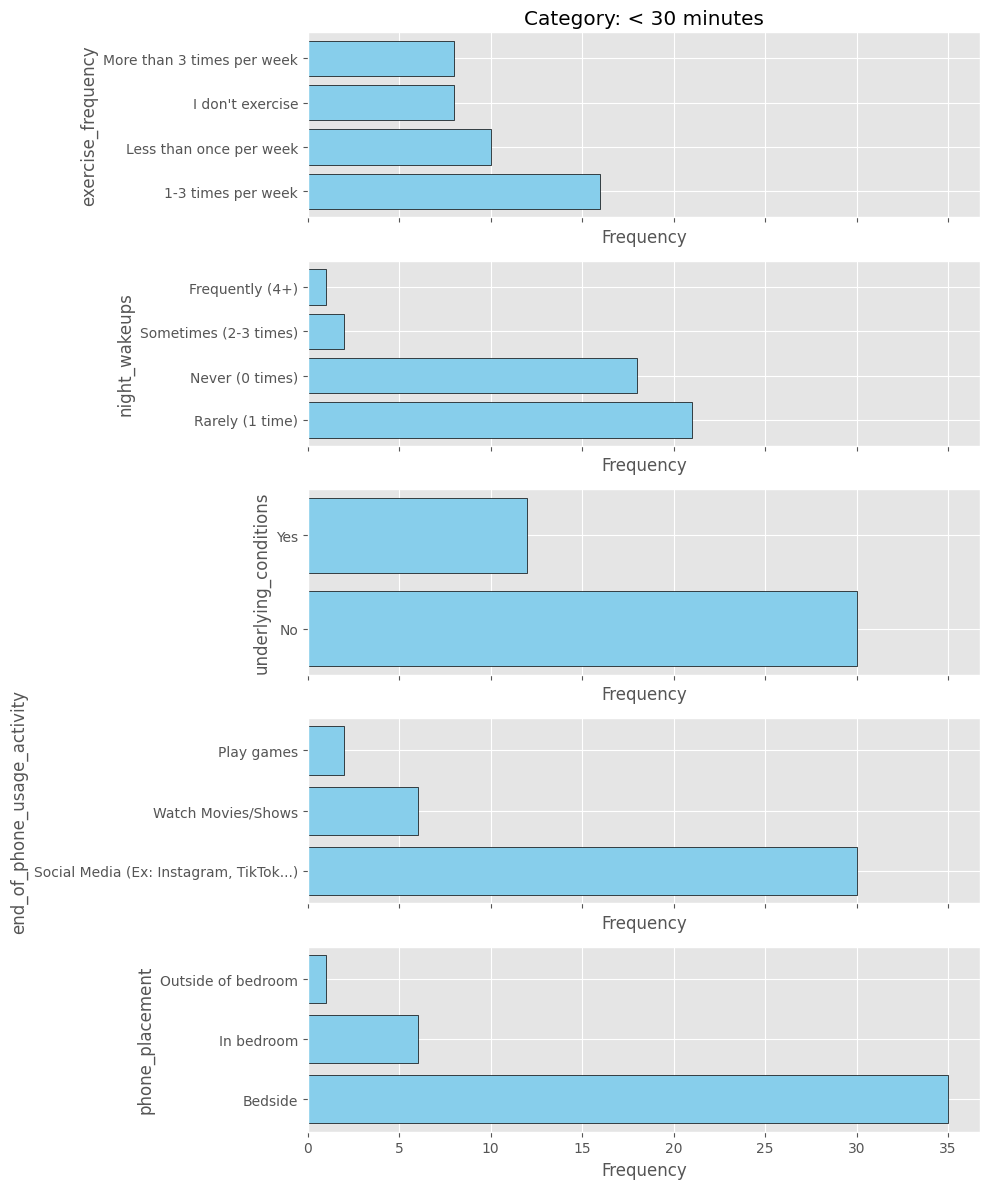

In [6]:
category = "< 30 minutes"

# Define the DataFrame directly
data = {
  "end_of_phone_usage_activity",
  "phone_placement",
  "night_wakeups",
  "underlying_conditions",
  "exercise_frequency",
}

# Plot the vertical bar graphs for each question
fig, axes = plt.subplots(len(data), figsize=(10, 12), sharex=True)

axes[0].set_title(f"Category: {category}")

for i, question in enumerate(data):
  filtered_df = df[df["end_of_phone_usage"] == category]

  # Limiting options for "end_of_phone_usage_activity"
  if question == "end_of_phone_usage_activity":
    filtered_df = filtered_df[
      filtered_df[question].isin(
        ["Social Media (Ex: Instagram, TikTok...)", "Watch Movies/Shows", "Play games"]
      )
    ]

  # Count occurrences of each option in the current column
  counts = filtered_df[question].value_counts()

  # Print associated values to the question
  print(f"Values associated with question: {question}")
  print(counts)
  print()

  axes[i].barh(counts.index, counts.values, color="skyblue", edgecolor="black")
  axes[i].set_xlabel("Frequency")
  axes[i].set_ylabel(question)

plt.tight_layout()
plt.show()

## Category: 30 minutes - 1 hour


Values associated with question: end_of_phone_usage_activity
end_of_phone_usage_activity
Play games                                 2.0
Social Media (Ex: Instagram, TikTok...)    2.0
Watch Movies/Shows                         1.0
dtype: float64

Values associated with question: phone_placement
phone_placement
Bedside       4.0
In bedroom    1.0
dtype: float64

Values associated with question: night_wakeups
night_wakeups
Never (0 times)          1.0
Rarely (1 time)          3.0
Sometimes (2-3 times)    1.0
dtype: float64

Values associated with question: underlying_conditions
underlying_conditions
No     3.0
Yes    2.0
dtype: float64

Values associated with question: exercise_frequency
exercise_frequency
1-3 times per week         3.0
I don't exercise           1.0
Less than once per week    1.0
dtype: float64



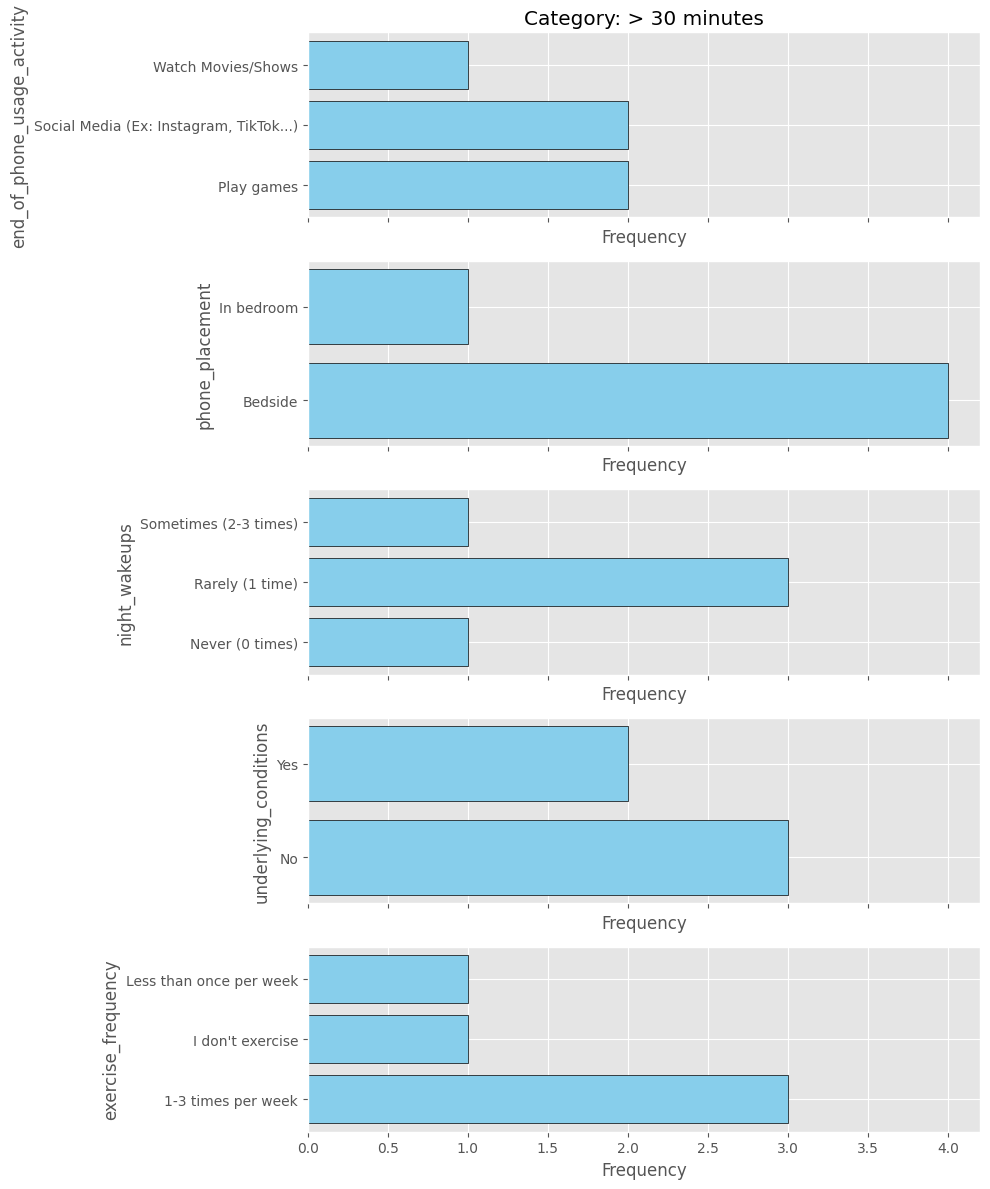

In [7]:
categories = ["30 minutes - 1 hour", "> 1 hour"]

# Define the DataFrame directly
data = [
  "end_of_phone_usage_activity",
  "phone_placement",
  "night_wakeups",
  "underlying_conditions",
  "exercise_frequency",
]

# Plot the vertical bar graphs for each question
fig, axes = plt.subplots(len(data), figsize=(10, 12), sharex=True)

axes[0].set_title("Category: > 30 minutes")

for i, question in enumerate(data):
  merged_counts = pd.Series(dtype=int)
  for category in categories:
    filtered_df = df[
      df["end_of_phone_usage"] == category
    ].copy()  # Make a copy to avoid modifying the original DataFrame

    # For exercise_frequency, replace 1 with "Yes" and 0 with "No"
    if question == "underlying_conditions":
      filtered_df.loc[:, question] = filtered_df[question].replace({1: "Yes", 0: "No"})

  # Count occurrences of each option in the current column
  counts = filtered_df[question].value_counts()
  merged_counts = merged_counts.add(counts, fill_value=0)

  # Print associated values to the question
  print(f"Values associated with question: {question}")
  print(merged_counts)
  print()

  axes[i].barh(
    merged_counts.index, merged_counts.values, color="skyblue", edgecolor="black"
  )
  axes[i].set_xlabel("Frequency")
  axes[i].set_ylabel(question)

plt.tight_layout()
plt.show()

# Heatmap of Variable Correlations


In [8]:
# Convert the 'underlying_conditions' column to a boolean
df["underlying_conditions"] = df["underlying_conditions"].apply(
  lambda x: False if x == "No" else True
)

# One-hot encode certain columns.
df_encoded = pd.get_dummies(
  df,
  columns=[
    "end_of_phone_usage",
    "end_of_phone_usage_activity",
    "phone_placement",
    "time_to_fall_asleep",
    "night_wakeups",
    "exercise_frequency",
  ],
)

# TODO: Handle sleep_environment later (currently being dropped)
df_encoded = df_encoded.drop(columns=["sleep_environment"], axis=1)

# replace spaces with underscores and make lowercase
df_encoded.columns = df_encoded.columns.str.replace(" ", "_").str.lower()

# Rename Columns
df_encoded = df_encoded.rename(
  columns={
    "end_of_phone_usage_30_minutes_-_1_hour": "end_of_phone_usage_between_30_minutes_and_1_hour",
    "end_of_phone_usage_<_30_minutes": "end_of_phone_usage_less_than_30_minutes",
    "end_of_phone_usage_>_1_hour": "end_of_phone_usage_more_than_1_hour",
    "end_of_phone_usage_activity_browsing_social_media_(ex:_instagram,_tiktok...)": "end_of_phone_usage_activity_browsing_social_media",
    "time_to_fall_asleep_30_minutes_-_1_hour": "time_to_fall_asleep_between_30_minutes_and_1_hour",
    "time_to_fall_asleep_<_30_minutes": "time_to_fall_asleep_less_than_30_minutes",
    "time_to_fall_asleep_>_1_hour": "time_to_fall_asleep_more_than_1_hour",
    "night_wakeups_never_(0_times)": "night_wakeups_never_(0)",
    "night_wakeups_rarely_(1_time)": "night_wakeups_rarely_(1)",
    "night_wakeups_sometimes_(2-3_times)": "night_wakeups_sometimes_(2-3)",
    "exercise_frequency_i_don't_exercise": "exercise_frequency_never",
  }
)

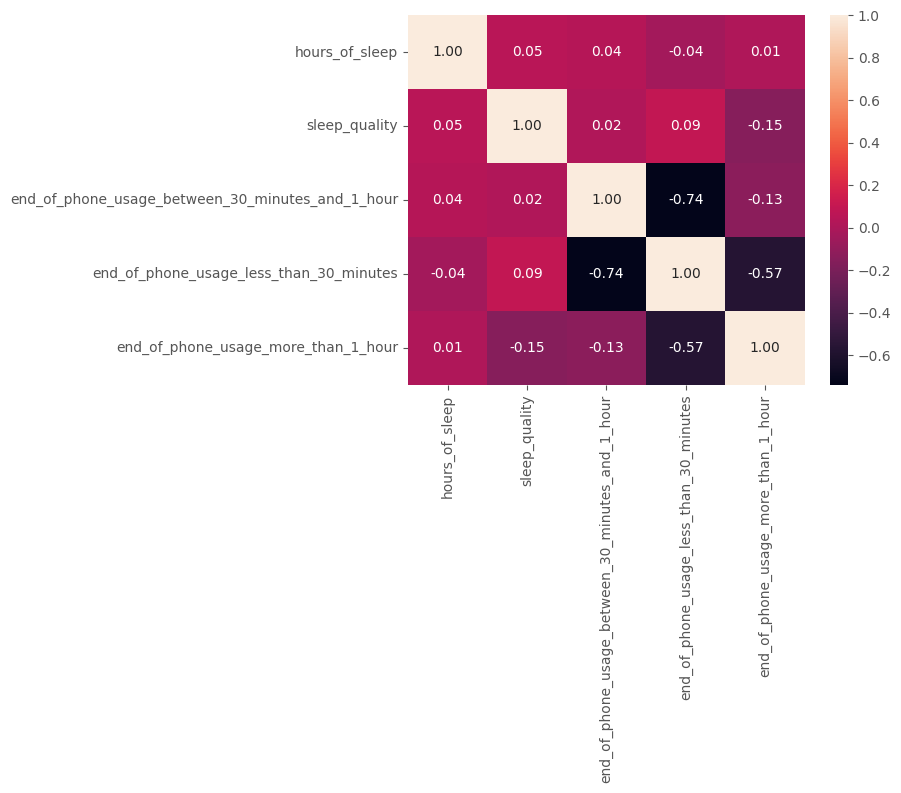

In [9]:
# Calculate correlations between variables
df_corr = df_encoded[
  [
    "hours_of_sleep",
    "sleep_quality",
    "end_of_phone_usage_between_30_minutes_and_1_hour",
    "end_of_phone_usage_less_than_30_minutes",
    "end_of_phone_usage_more_than_1_hour",
  ]
].corr()

# Generate heatmap
heatmap = sns.heatmap(df_corr, annot=True, fmt=".2f")

# Calculations


## Sample Size, Mean and Standard Deviation per Device Usage Group


In [10]:
# Define the categories for end_of_phone_usage
categories = ["< 30 minutes", "> 30 minutes"]

# Iterate over each category of end_of_phone_usage
for category in categories:
  # Filter the dataframe for the current category
  if category == "< 30 minutes":
    filtered_df = df[df["end_of_phone_usage"] == category]
  else:
    filtered_df = df[df["end_of_phone_usage"].isin(["30 minutes - 1 hour", "> 1 hour"])]

  # Calculate sample size, mean, median, mode, standard deviation,
  # quartiles, and interquartile range
  n = len(filtered_df)
  mu, std = norm.fit(filtered_df["hours_of_sleep"])
  median = filtered_df["hours_of_sleep"].median()
  mode = (
    filtered_df["hours_of_sleep"].mode().iloc[0]
  )  # Mode may return multiple values, so we take the first one
  q1 = filtered_df["hours_of_sleep"].quantile(0.25)
  q3 = filtered_df["hours_of_sleep"].quantile(0.75)
  iqr = q3 - q1

  # Calculate 95% confidence interval
  confidence_interval = norm.interval(0.95, loc=mu, scale=std / (n**0.5))
  confidence_interval_rounded = (
    round(confidence_interval[0], 2),
    round(confidence_interval[1], 2),
  )

  # Print results
  print(f"Category: {category}")
  print(f"   Sample Size (n): {n}")
  print(f"   Mean (mu): {mu}")
  print(f"   Median: {median}")
  print(f"   Mode: {mode}")
  print(f"   Standard Deviation: {std}")
  print(f"   1st Quartile (Q1): {q1}")
  print(f"   3rd Quartile (Q3): {q3}")
  print(f"   Interquartile Range (IQR): {iqr}")
  print(f"   95% Confidence Interval: {confidence_interval_rounded}\n")

Category: < 30 minutes
   Sample Size (n): 42
   Mean (mu): 6.738095238095238
   Median: 7.0
   Mode: 7
   Standard Deviation: 1.2546963929767045
   1st Quartile (Q1): 6.0
   3rd Quartile (Q3): 7.75
   Interquartile Range (IQR): 1.75
   95% Confidence Interval: (6.36, 7.12)

Category: > 30 minutes
   Sample Size (n): 13
   Mean (mu): 6.846153846153846
   Median: 7.0
   Mode: 6
   Standard Deviation: 1.166596222161777
   1st Quartile (Q1): 6.0
   3rd Quartile (Q3): 7.0
   Interquartile Range (IQR): 1.0
   95% Confidence Interval: (6.21, 7.48)



## Performing the T-Tests


In [11]:
from scipy.stats import ttest_ind

# Perform t-test between merged category and "< 30 minutes"
category_1 = "< 30 minutes"
category_2 = "> 30 minutes"

# Filter data for the two categories
data_cat1 = df[df["end_of_phone_usage"] == category_1]["hours_of_sleep"]
data_cat2 = df[df["end_of_phone_usage"].isin(["30 minutes - 1 hour", "> 1 hour"])][
  "hours_of_sleep"
]

# Perform t-test
t_stat, p_value = ttest_ind(data_cat1, data_cat2)

# Print results
print(f"T-test between `{category_1}` and `{category_2}`:")
print(f"   T-statistic: {t_stat}")
print(f"   P-value: {p_value}")

# Determine the significance
alpha = 0.05
if p_value < alpha:
  print("\nThe differences between group means are statistically significant.")
else:
  print("\nThere is no statistically significant difference between group means.")

T-test between `< 30 minutes` and `> 30 minutes`:
   T-statistic: -0.27074525154304346
   P-value: 0.7876386012124794

There is no statistically significant difference between group means.


# Comments

## Did your method of sampling result in a random sample?

The method if sampling used in this experiment, which involved sharing a Google Form survey with university students aged 20-24 attending Concordia University, does not exactly result in a random sample. This is because the sample was obtained through convenience sampling, where individuals who were easily accessible and willing to participate were included. While this method can be efficient and cost-effective, it may introduce bias into the sample, as individuals who choose to participate may have different characteristics or experiences compared to those who do not participate.

## If your sample was not a random sample, what sorts of measures could you take if you were to do this project again, to get a random sample?

If we were to conduct this project again with the aim of obtaining a random sample, several measures would be taken. One approach would be to implement simple random sampling, where every member of the population has an equal chance of being selected for the sample. This could involve using a random number generator to select participants from a list of all eligible individuals within the target population. Alternatively, stratified random sampling could be employed to ensure representation from different subgroups within the population, such as different age groups or academic majors.

## Based on the experiment, would it be appropriate to write a revised hypothesis (“in Hampsteand, 5 cars go through each yellow light.”)

Based on the experiment's findings, it may be appropriate to consider revising the hypothesis to reflect the nuanced relationships observed between device usage patterns and sleep quality. Rather than a binary hypothesis stating that extended device usage before bedtime is associated with poorer sleep quality, a revised hypothesis could acknowledge the complexity of these relationships and explore potential moderators or mediators that may influence the observed associations. For example, the revised hypothesis could consider factors such as individual differences in screen time habits, bedtime routines, and underlying health conditions that may interact with device usage to impact sleep quality.

## Comment on whether you think your results can be extrapolated to draw more general conclusions, perhaps on wider populations. State your opinion and then back it up with well-reasoned arguments.

In terms of extrapolating the results to draw more general conclusions, it's essential to consider the limitations of the study design and sample characteristics. The sample consisted of university students aged 20-24 from a specific institution, which may limit the generalizability of the findings to wider populations. Additionally, the use of self-reported data and the potential for selection bias may affect the validity and reliability of the results. While the findings provide valuable insights into the relationships between device usage and sleep quality within this specific demographic, caution should be exercised when applying these findings to broader populations.


# Conclusion

In conclusion, this study investigated the relationship between extended use of electronic devices before bedtime and sleep quality among university students aged 20-24.

Our findings revealed nuanced associations between device usage patterns and sleep outcomes. While descriptive statistics highlighted slight variations in mean sleep duration between individuals with different levels of device usage before bedtime, a t-test analysis indicated a lack of statistically significant difference in mean hours slept between groups with device usage durations of less than 30 minutes and more than 30 minutes.

Furthermore, correlation analyses unveiled intriguing dynamics, suggesting potential links between shorter device usage before sleep and longer sleep duration, as well as between prolonged device usage and shorter sleep duration. Additionally, associations between device usage patterns and subjective sleep quality were observed, with shorter device usage linked to more favorable perceptions of sleep quality and prolonged usage associated with poorer subjective sleep quality.
